In [399]:
# Import Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from functions import convert_time_to_seconds

In [400]:
# Specify the file path
file_path = 'RunningData/David+_Diaz+_2024-01-01_15-35-44.CSV'
# Read the first row separately as it contains aggregated statistics
header = pd.read_csv(file_path, nrows=1)
# Grab the rest of the rows on the data
running = pd.read_csv(file_path, skiprows=[0, 1])

In [401]:
# Path to the folder of data
folder_path = 'RunningData'
number_of_files = 0

# Create an empty list to store all running data
all_running_data = []

# Create an empty list to store all aggregated data
all_headers_data = []
# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # Check if the file is a CSV
    if filename.endswith('.CSV'):
        print(f"Processing file: {filename}")
        number_of_files += 1
        
        try:
            # Read the first row separately (aggregated statistics)
            header = pd.read_csv(file_path, nrows=1)
            
            # Read the rest of the data, skipping the first two rows
            running = pd.read_csv(file_path, skiprows=[0, 1])
            
            # Extract Date and Start Time from header
            date_str = header['Date'].values[0]  # Assuming it's in 'Date' column
            start_time_str = header['Start time'].values[0]  # Assuming it's in 'Start time' column

            # Combine the date and start time to form a datetime object
            start_datetime_str = f"{date_str} {start_time_str}"
            start_datetime = datetime.strptime(start_datetime_str, "%d-%m-%Y %H:%M:%S")
            
            # Convert 'Time' column (hh:mm:ss format) to timedeltas
            running['Time'] = pd.to_timedelta(running['Time'])

            # Create a new column 'Real_Time' by adding 'Time' column to the start datetime
            running['Real_Time'] = running['Time'] + start_datetime

            running['Source_File'] = filename

            # Append the Headers to the list
            all_headers_data.append(header)
            
            # Append the processed DataFrame to the list
            all_running_data.append(running)

        except pd.errors.EmptyDataError:
            print(f"Error: {filename} is empty or has invalid format")
        except FileNotFoundError:
            print(f"Error: {filename} not found")
        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

print(f"\n Total Amount of Files Processes: {number_of_files}")

Processing file: David+_Diaz+_2024-02-06_14-43-30.CSV
Processing file: David+_Diaz+_2024-06-21_19-35-59.CSV
Processing file: David+_Diaz+_2024-01-09_16-27-42.CSV
Processing file: David+_Diaz+_2024-07-03_17-52-41.CSV
Processing file: David+_Diaz+_2024-07-16_20-02-21.CSV
Processing file: David+_Diaz+_2024-07-24_19-57-39.CSV
Processing file: David+_Diaz+_2024-01-11_15-59-36.CSV
Processing file: David+_Diaz+_2024-01-23_14-30-16.CSV
Processing file: David+_Diaz+_2024-01-27_17-09-41.CSV
Processing file: David+_Diaz+_2024-06-26_20-05-02.CSV
Processing file: David+_Diaz+_2024-01-01_15-35-44.CSV
Processing file: David+_Diaz+_2024-07-27_18-05-44.CSV
Processing file: David+_Diaz+_2024-01-16_14-07-56.CSV
Processing file: David+_Diaz+_2024-02-16_14-21-16.CSV
Processing file: David+_Diaz+_2024-06-03_18-49-07.CSV
Processing file: David+_Diaz+_2024-02-28_17-51-31.CSV
Processing file: David+_Diaz+_2024-01-18_10-42-57.CSV
Processing file: David+_Diaz+_2024-06-09_17-36-33.CSV
Processing file: David+_Diaz

In [402]:
# After processing all files, concatenate all the DataFrames into one
if all_running_data:
    combined_running_df = pd.concat(all_running_data, ignore_index=True)
    
else:
    print("No data to concatenate.")

In [403]:
if all_headers_data:
    combined_headers_df = pd.concat(all_headers_data, ignore_index=True)
    
else:
    print("No data to concatenate.")

In [404]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_running_df['run_id'] = le.fit_transform(combined_running_df['Source_File'])

In [405]:
# Visualize the concatenated data
combined_running_df.head()

,Sample rate,Time,HR (bpm),Speed (mi/h),Pace (min/mi),Cadence,Altitude (ft),Stride length (in),Distances (ft),Temperatures (F),Power (W),Unnamed: 11,Real_Time,Source_File,run_id
0,1.0,0 days 00:00:00,116.0,0.0,00:00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,2024-02-06 14:43:30,David+_Diaz+_2024-02-06_14-43-30.CSV,9
1,NaN,0 days 00:00:01,116.0,3.2,18:36,NaN,NaN,NaN,0.00,NaN,NaN,NaN,2024-02-06 14:43:31,David+_Diaz+_2024-02-06_14-43-30.CSV,9
2,NaN,0 days 00:00:02,116.0,5.9,10:13,NaN,NaN,NaN,14.85,NaN,NaN,NaN,2024-02-06 14:43:32,David+_Diaz+_2024-02-06_14-43-30.CSV,9
3,NaN,0 days 00:00:03,116.0,5.9,10:13,NaN,NaN,NaN,27.78,NaN,NaN,NaN,2024-02-06 14:43:33,David+_Diaz+_2024-02-06_14-43-30.CSV,9
4,NaN,0 days 00:00:04,116.0,7.5,07:57,NaN,NaN,NaN,42.63,NaN,NaN,NaN,2024-02-06 14:43:34,David+_Diaz+_2024-02-06_14-43-30.CSV,9


In [406]:
# Rename the Columns into Name without whitespaces
combined_running_df.rename(columns={'HR (bpm)': 'HR', 'Speed (mi/h)': 'Speed', 'Pace (min/mi)': 'Pace', 'Distances (ft)': 'distances'}, inplace=True)

In [407]:
# Create new Columns and utilize the function from above to convert into their respective units
combined_running_df['Pace_in_minutes'] = combined_running_df['Pace'].apply(convert_time_to_seconds)

In [408]:
# Convert Real_Time to datetime type
combined_running_df['Real_Time'] = pd.to_datetime(combined_running_df['Real_Time'])

In [409]:
data = combined_running_df[['run_id','Real_Time', 'HR', 'Pace_in_minutes', 'Speed', 'distances']]

In [410]:
# Find Missing Values
data.isna().sum()

run_id                 0
Real_Time              0
HR                 13632
Pace_in_minutes        0
Speed                  0
distances              0
dtype: int64

In [411]:
null_values = data[data['HR'].isna()]

# Extract the date from 'Real_Time' and create a new column for it
null_values['Date'] = null_values['Real_Time'].dt.date

# Count the number of rows for each date in null_values
total_count_of_rows_by_day = null_values.groupby('Date').size().reset_index(name='Count_of_Rows')

/var/folders/m8/3d9l71wn6bs6v2c3m0gltnpr0000gn/T/ipykernel_48196/3578226254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_values['Date'] = null_values['Real_Time'].dt.date


In [412]:
# Find Counts of Nulls by Date
total_count_of_rows_by_day

,Date,Count_of_Rows
0,2024-06-03,1165
1,2024-06-09,892
2,2024-06-21,1594
3,2024-06-26,2056
4,2024-06-30,1018
5,2024-07-03,1010
6,2024-07-16,1075
7,2024-07-20,1610
8,2024-07-24,1612
9,2024-07-27,1600


In [413]:
# Get the list of dates to remove
dates_to_remove = total_count_of_rows_by_day['Date'].unique()

# Remove rows where the date in 'Real_Time' is in dates_to_remove
filtered_data = data[~data['Real_Time'].dt.date.isin(dates_to_remove)]


In [414]:
filtered_data

,run_id,Real_Time,HR,Pace_in_minutes,Speed,distances
0,9,2024-02-06 14:43:30,116.0,0.000000,0.0,0.00
1,9,2024-02-06 14:43:31,116.0,18.600000,3.2,0.00
2,9,2024-02-06 14:43:32,116.0,10.216667,5.9,14.85
3,9,2024-02-06 14:43:33,116.0,10.216667,5.9,27.78
4,9,2024-02-06 14:43:34,116.0,7.950000,7.5,42.63
...,...,...,...,...,...,...
36941,7,2024-01-29 14:38:34,158.0,8.783333,6.8,21076.54
36942,7,2024-01-29 14:38:35,158.0,8.550000,7.0,21092.27
36943,7,2024-01-29 14:38:36,158.0,8.400000,7.1,21099.58
36944,7,2024-01-29 14:38:37,158.0,8.500000,7.1,21115.31


In [415]:
filtered_data.describe()

,run_id,Real_Time,HR,Pace_in_minutes,Speed,distances
count,23314.000000,23314,23314.000000,23314.000000,23314.000000,23314.000000
mean,7.395213,2024-02-01 05:10:54.050699264,148.996955,8.624630,7.128211,9593.721567
min,0.000000,2024-01-01 15:35:44,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2024-01-18 10:46:34.249999872,153.000000,7.683333,6.600000,4610.222500
50%,8.000000,2024-02-03 12:15:01.500000,160.000000,8.300000,7.200000,8910.000000
75%,11.000000,2024-02-13 17:48:58.750000128,164.000000,9.033333,7.800000,13464.335000
max,14.000000,2024-02-28 18:09:46,177.000000,115.000000,10.800000,31704.990000
std,4.282844,NaN,38.278458,2.130687,1.112968,6379.109208


In [416]:
real_time = filtered_data['Real_Time']
heart_rate = filtered_data['HR']
pace = filtered_data['Pace_in_minutes']
speed = filtered_data['Speed']

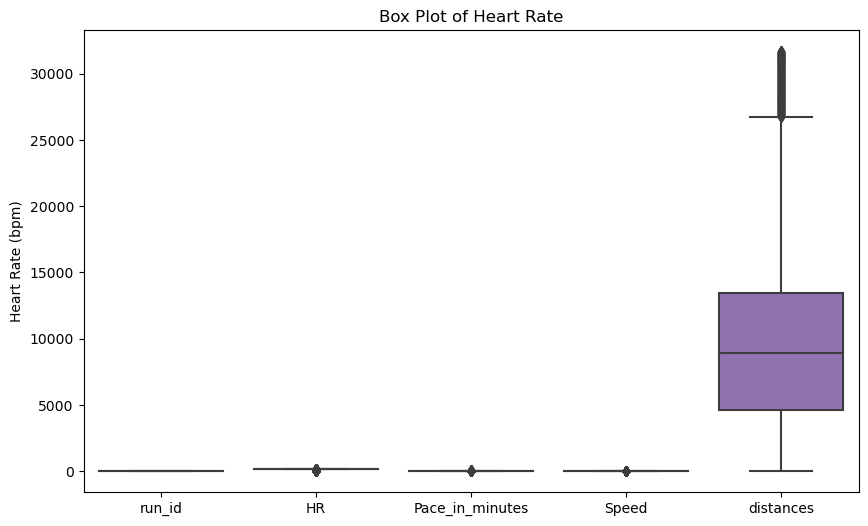

In [417]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(filtered_data)
plt.title('Box Plot of Heart Rate')
plt.ylabel('Heart Rate (bpm)')
plt.show()

### Need to remove outliers of HR

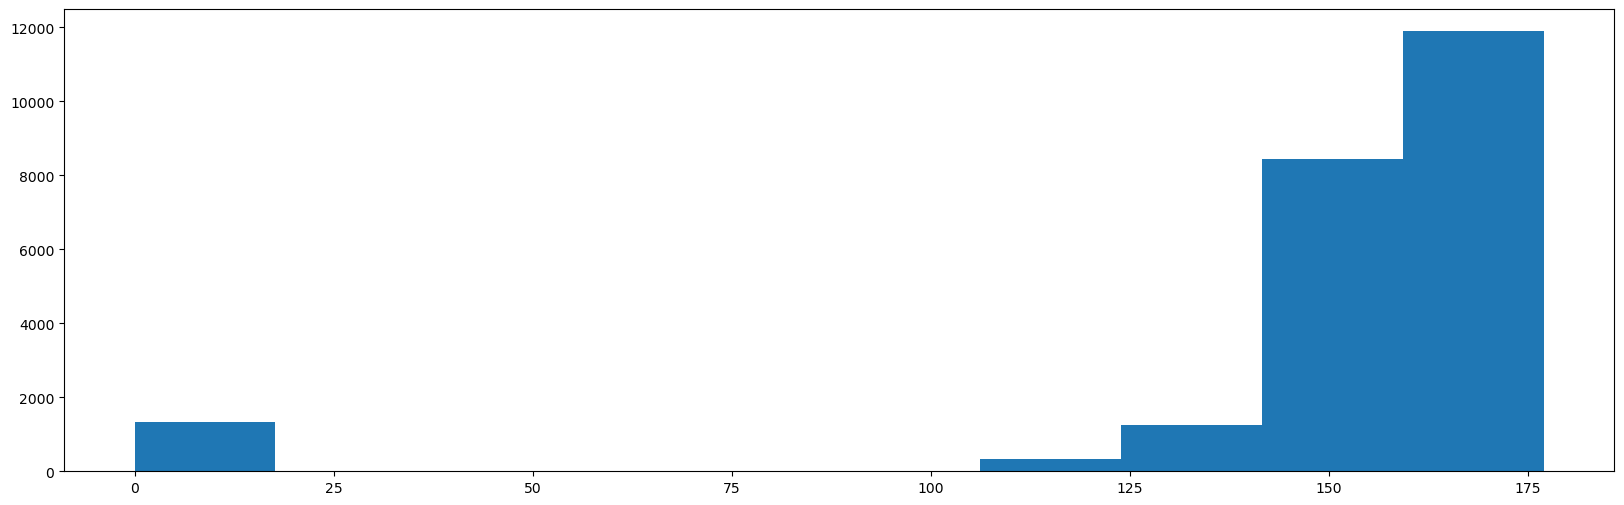

In [418]:
# Visualize Histogram
plt.figure(figsize=(20,6))
plt.hist(heart_rate)
plt.show()

In [419]:
normalized_data = filtered_data[filtered_data['HR'] > 110]

In [420]:
normalized_data

,run_id,Real_Time,HR,Pace_in_minutes,Speed,distances
0,9,2024-02-06 14:43:30,116.0,0.000000,0.0,0.00
1,9,2024-02-06 14:43:31,116.0,18.600000,3.2,0.00
2,9,2024-02-06 14:43:32,116.0,10.216667,5.9,14.85
3,9,2024-02-06 14:43:33,116.0,10.216667,5.9,27.78
4,9,2024-02-06 14:43:34,116.0,7.950000,7.5,42.63
...,...,...,...,...,...,...
36941,7,2024-01-29 14:38:34,158.0,8.783333,6.8,21076.54
36942,7,2024-01-29 14:38:35,158.0,8.550000,7.0,21092.27
36943,7,2024-01-29 14:38:36,158.0,8.400000,7.1,21099.58
36944,7,2024-01-29 14:38:37,158.0,8.500000,7.1,21115.31


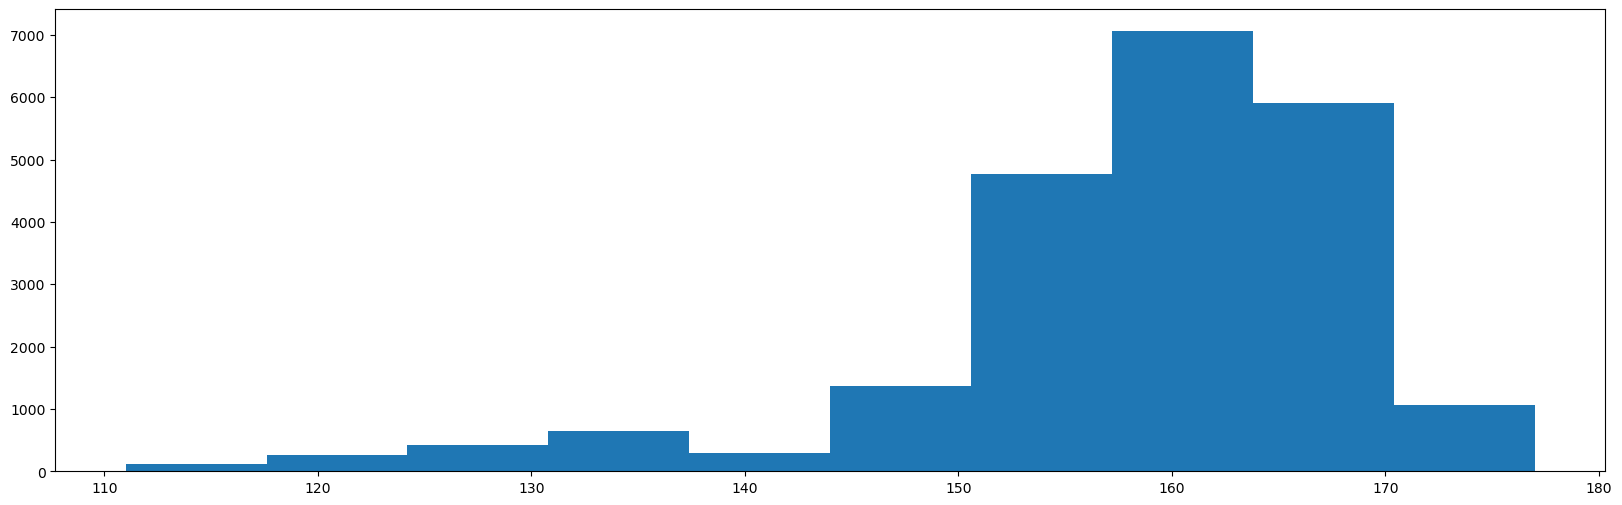

In [421]:
# Visualize Histogram
plt.figure(figsize=(20,6))
plt.hist(normalized_data['HR'])
plt.show()

In [422]:
normalized_data

,run_id,Real_Time,HR,Pace_in_minutes,Speed,distances
0,9,2024-02-06 14:43:30,116.0,0.000000,0.0,0.00
1,9,2024-02-06 14:43:31,116.0,18.600000,3.2,0.00
2,9,2024-02-06 14:43:32,116.0,10.216667,5.9,14.85
3,9,2024-02-06 14:43:33,116.0,10.216667,5.9,27.78
4,9,2024-02-06 14:43:34,116.0,7.950000,7.5,42.63
...,...,...,...,...,...,...
36941,7,2024-01-29 14:38:34,158.0,8.783333,6.8,21076.54
36942,7,2024-01-29 14:38:35,158.0,8.550000,7.0,21092.27
36943,7,2024-01-29 14:38:36,158.0,8.400000,7.1,21099.58
36944,7,2024-01-29 14:38:37,158.0,8.500000,7.1,21115.31


In [423]:
# Find Dates for Unique Dates
unique_runs = normalized_data['Real_Time'].dt.date.unique()
formatted_dates = [date.strftime("%Y-%m-%d") for date in unique_runs]
formatted_dates

['2024-02-06',
 '2024-01-09',
 '2024-01-11',
 '2024-01-23',
 '2024-01-27',
 '2024-01-01',
 '2024-01-16',
 '2024-02-16',
 '2024-02-28',
 '2024-01-18',
 '2024-02-03',
 '2024-02-25',
 '2024-02-13',
 '2024-02-10',
 '2024-01-29']

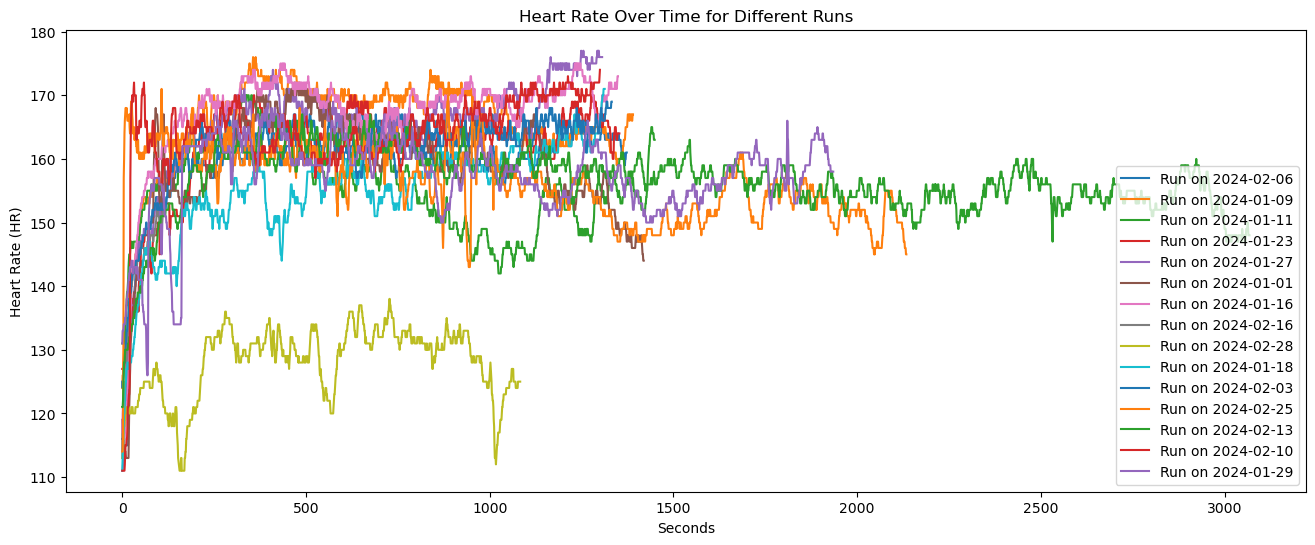

In [424]:
# Iterrate through the unique dates to visualize the parameters of the run
plt.figure(figsize=(16, 6))

# Iterate through the unique dates to visualize the parameters of each run
for date in unique_runs:
    # Filter data for the current date
    data = normalized_data[normalized_data['Real_Time'].dt.date == date].copy()

    if data.empty:
        print(f"No data for {date}")
        continue

    # Sort by 'Real_Time'
    data = data.sort_values(by='Real_Time')

    # Calculate time difference from the first time of the day and extract total seconds
    time_difference = data['Real_Time'] - data['Real_Time'].min()
    data['seconds'] = time_difference.dt.total_seconds().astype(int)

    # Get HR and seconds for plotting
    hr = data['HR']
    seconds = data['seconds']
    
    # Plot HR against seconds with a label for each run's date
    plt.plot(seconds, hr, label=f'Run on {date}')

# Add labels and title
plt.xlabel('Seconds')
plt.ylabel('Heart Rate (HR)')
plt.title('Heart Rate Over Time for Different Runs')

# Add a legend to differentiate runs
plt.legend(loc='best')

# Show the plot
plt.show()

In [425]:
# Calculate time difference and aggregate HR for all runs
normalized_data['seconds'] = (normalized_data['Real_Time'] - normalized_data.groupby('run_id')['Real_Time'].transform('min')).dt.total_seconds().astype(int)

/var/folders/m8/3d9l71wn6bs6v2c3m0gltnpr0000gn/T/ipykernel_48196/3340131240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_data['seconds'] = (normalized_data['Real_Time'] - normalized_data.groupby('run_id')['Real_Time'].transform('min')).dt.total_seconds().astype(int)


In [426]:
# Aggregate heart rate data across all runs by seconds
aggregated_data = normalized_data.groupby('seconds').agg(
    mean_hr=('HR', 'mean'),
    min_hr=('HR', 'min'),
    max_hr=('HR', 'max'),
    median_hr=('HR', 'median'),
    std_hr=('HR', 'std'),
    var_hr=('HR', 'var'),
    count_hr=('HR', 'count'),
    range_hr=('HR', lambda x: x.max() - x.min())
).reset_index()

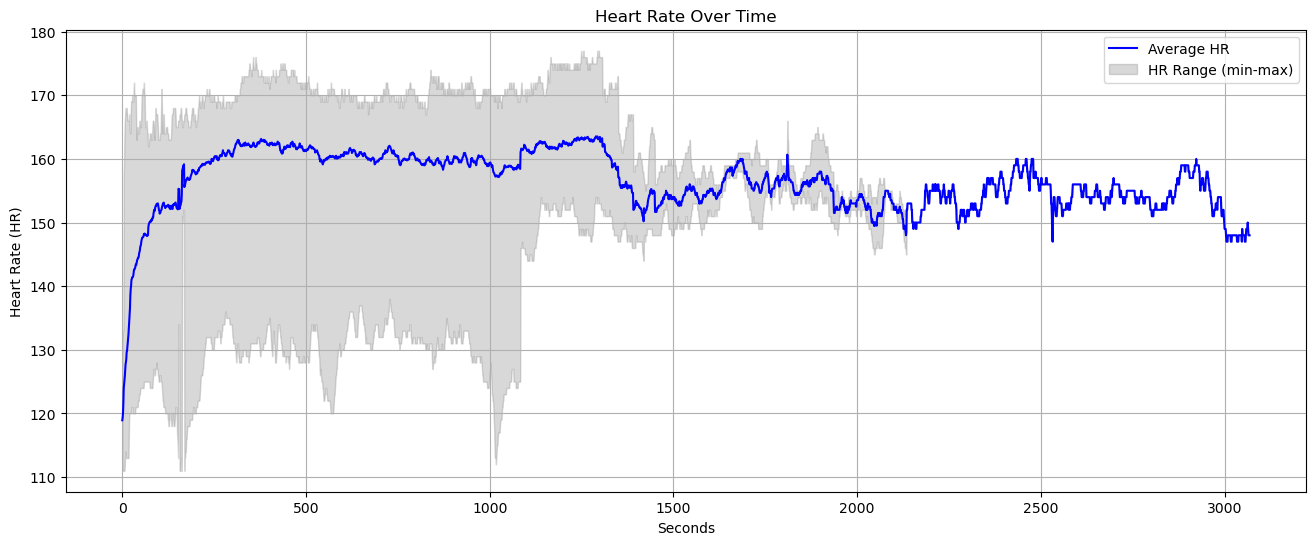

In [427]:
# Plot the average heart rate
plt.figure(figsize=(16, 6))
plt.plot(aggregated_data['seconds'], aggregated_data['mean_hr'], label='Average HR', color='blue')

# Fill between min and max HR to show the noise
plt.fill_between(aggregated_data['seconds'], aggregated_data['min_hr'], aggregated_data['max_hr'], color='gray', alpha=0.3, label='HR Range (min-max)')

# Add labels and title
plt.xlabel('Seconds')
plt.ylabel('Heart Rate (HR)')
plt.title('Heart Rate Over Time')

# Add a legend
plt.legend(loc='best')

# Show the plot with a grid
plt.grid(True)
plt.show()

#### Analysis of Variance (ANOVA)
- Differenent distance check points

In [428]:
# Rename the Columns into Name without whitespaces
combined_headers_df.rename(columns={'Average heart rate (bpm)': 'Average_HR', 'Max speed (mi/h)': 'Max_Speed', 'Average speed (mi/h)': 'Average_Speed', 'Average pace (min/mi)': 'Average_Pace', 'Total distance (mi)': 'total_distance'}, inplace=True)

In [429]:
# Update time variable into readable units
combined_headers_df['Duration_in_minutes'] = combined_headers_df['Duration'].apply(convert_time_to_seconds)
combined_headers_df['Average_Pace_in_minutes'] = combined_headers_df['Average_Pace'].apply(convert_time_to_seconds)
combined_headers_df['Average_Speed_in_minutes'] = combined_headers_df['Average_Speed'].apply(convert_time_to_seconds)
combined_headers_df['Max_Speed_in_minutes'] = combined_headers_df['Max_Speed'].apply(convert_time_to_seconds)

In [430]:
# Convert both Date columns to datetime format
combined_headers_df['Date'] = pd.to_datetime(combined_headers_df['Date'], format='%d-%m-%Y')
total_count_of_rows_by_day['Date'] = pd.to_datetime(total_count_of_rows_by_day['Date'], format='%Y-%m-%d')

# Filter out rows in combined_headers_df where Date is in total_count_of_rows_by_day['Date']
filtered_headers_df = combined_headers_df[~combined_headers_df['Date'].isin(total_count_of_rows_by_day['Date'])]

# Optionally, print out the dates that were removed
for date in combined_headers_df['Date'].unique():
    if date in total_count_of_rows_by_day['Date'].values:
        print(f"Run dropped because of no heart rate: {date.strftime('%d-%m-%Y')}")

Run dropped because of no heart rate: 21-06-2024
Run dropped because of no heart rate: 03-07-2024
Run dropped because of no heart rate: 16-07-2024
Run dropped because of no heart rate: 24-07-2024
Run dropped because of no heart rate: 26-06-2024
Run dropped because of no heart rate: 27-07-2024
Run dropped because of no heart rate: 03-06-2024
Run dropped because of no heart rate: 09-06-2024
Run dropped because of no heart rate: 30-06-2024
Run dropped because of no heart rate: 20-07-2024


In [432]:
filtered_headers_df[['Duration_in_minutes', 'total_distance', 'Average_HR', 'Average_Speed_in_minutes', 'Max_Speed_in_minutes', 'Average_Pace_in_minutes']].corr()

,Duration_in_minutes,total_distance,Average_HR,Average_Speed_in_minutes,Max_Speed_in_minutes,Average_Pace_in_minutes
Duration_in_minutes,1.000000,0.960501,0.043312,NaN,NaN,0.015734
total_distance,0.960501,1.000000,0.288164,NaN,NaN,-0.261082
Average_HR,0.043312,0.288164,1.000000,NaN,NaN,-0.872360
Average_Speed_in_minutes,NaN,NaN,NaN,NaN,NaN,NaN
Max_Speed_in_minutes,NaN,NaN,NaN,NaN,NaN,NaN
Average_Pace_in_minutes,0.015734,-0.261082,-0.872360,NaN,NaN,1.000000


#### Negative Correlation between Average Heart Rate and Average Pace

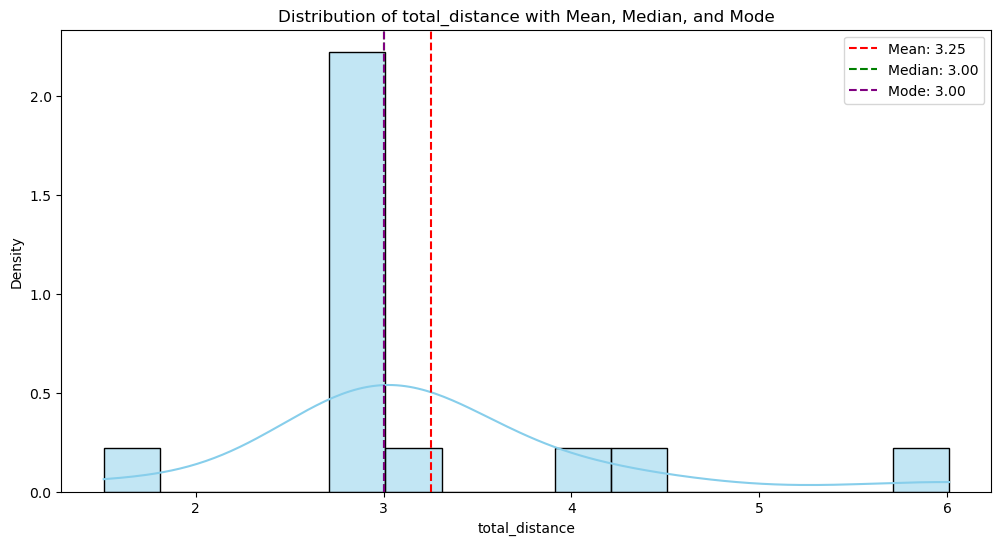

In [434]:
# Calculate the statistics
mean_value = filtered_headers_df['total_distance'].mean()
median_value = filtered_headers_df['total_distance'].median()
mode_value = filtered_headers_df['total_distance'].mode()[0]

# Set up the figure and bar plot
plt.figure(figsize=(12, 6))
sns.histplot(filtered_headers_df['total_distance'], kde=True, color='skyblue', stat='density', bins=15)

# Mark mean, median, and mode
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='purple', linestyle='--', label=f'Mode: {mode_value:.2f}')

# Label and legend
plt.xlabel('total_distance')
plt.ylabel('Density')
plt.title('Distribution of total_distance with Mean, Median, and Mode')
plt.legend()

plt.show()

In [435]:
# Have three groups based on distance
try:
    under_three_miles = filtered_headers_df[filtered_headers_df['total_distance'] < 3.00]
    three_miles = filtered_headers_df[filtered_headers_df['total_distance'] == 3.00]
    over_three_miles = filtered_headers_df[filtered_headers_df['total_distance'] > 3.00]
    # Find counts of runs for each group
    under_three_count = under_three_miles.shape[0]
    three_count = three_miles.shape[0]
    over_three_count = over_three_miles.shape[0]

    print(f"There are {under_three_count} runs that are under 3 miles.")
    print(f"There are {three_count} runs that are exactly 3 miles.")
    print(f"There are {over_three_count} runs over 3 miles.")
except Exception as e:
    print(f"An unexpected error occured: {e}")

There are 1 runs that are under 3 miles.
There are 10 runs that are exactly 3 miles.
There are 4 runs over 3 miles.


### Heart Rate Zones

In [440]:
# Karvonian Method to calculate ranges
age = 25

# Calculate Maximum Heart Rate (MHR)
MHR = 220 - age

# Define heart rate zones based on percentages of MHR
zones = {
    "Zone 1 (Very Light)": (0.50 * MHR, 0.60 * MHR),
    "Zone 2 (Light)": (0.60 * MHR, 0.70 * MHR),
    "Zone 3 (Moderate)": (0.70 * MHR, 0.80 * MHR),
    "Zone 4 (Hard)": (0.80 * MHR, 0.90 * MHR),
    "Zone 5 (Maximum)": (0.90 * MHR, MHR)
}

In [441]:
# Print heart rate zones
for zone, (lower, upper) in zones.items():
    print(f"{zone}: {lower:.1f} - {upper:.1f} bpm")

Zone 1 (Very Light): 97.5 - 117.0 bpm
Zone 2 (Light): 117.0 - 136.5 bpm
Zone 3 (Moderate): 136.5 - 156.0 bpm
Zone 4 (Hard): 156.0 - 175.5 bpm
Zone 5 (Maximum): 175.5 - 195.0 bpm


In [445]:
# Create a function to assign HR categories
def assign_hr_category(hr):
    for zone, (low, high) in zones.items():
        if low <= hr < high:
            return zone
    return "Outside Zones"  # For values outside defined zones

In [446]:
# Apply the function to create a new column for HR categories
filtered_headers_df['HR_Category'] = filtered_headers_df['Average_HR'].apply(assign_hr_category)

/var/folders/m8/3d9l71wn6bs6v2c3m0gltnpr0000gn/T/ipykernel_48196/2024113464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_headers_df['HR_Category'] = filtered_headers_df['Average_HR'].apply(assign_hr_category)


In [452]:
print(filtered_headers_df[['Average_HR', 'HR_Category']])

    Average_HR        HR_Category
0        161.0      Zone 4 (Hard)
2        166.0      Zone 4 (Hard)
6        156.0      Zone 4 (Hard)
7        162.0      Zone 4 (Hard)
8        165.0      Zone 4 (Hard)
10       159.0      Zone 4 (Hard)
12       167.0      Zone 4 (Hard)
13       143.0  Zone 3 (Moderate)
15       128.0     Zone 2 (Light)
16       155.0  Zone 3 (Moderate)
18       161.0      Zone 4 (Hard)
20       156.0      Zone 4 (Hard)
21       156.0      Zone 4 (Hard)
22       164.0      Zone 4 (Hard)
24       157.0      Zone 4 (Hard)


### TODO: PCA For to acount for additional features (pace, speed)